# Carbon intensity cap models

Load packages, load data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from cmocean import cm as cmo
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

In [3]:
flights = pd.read_csv("../data/by_route_airline.csv")
flights

,departure,arrival,arrival_longitude,arrival_latitude,departure_longitude,departure_latitude,airlinename,aircraft_types,avg_distance,flown_distance,gcd,flights,passengers,seats,average_load,co2,gco2_pax_km
0,SGN,HAN,105.806999,21.221201,106.652000,10.818800,Vietnam Airlines,5,1261.547796,1.154569e+07,1.063049e+07,9152,1.993998e+06,2447017,0.814869,191365.676340,76.944016
1,HAN,SGN,106.652000,10.818800,105.806999,21.221201,Vietnam Airlines,5,1261.547796,1.092879e+07,1.006249e+07,8663,1.966054e+06,2412725,0.814869,195266.817616,79.051205
2,CJU,GMP,126.791000,37.558300,126.492546,33.512058,Asiana Airlines,5,501.253150,5.223058e+06,4.702058e+06,10420,1.782774e+06,2123733,0.839453,100145.929946,110.904076
3,GMP,CJU,126.492546,33.512058,126.791000,37.558300,Asiana Airlines,5,501.253150,5.105765e+06,4.596465e+06,10186,1.719632e+06,2048514,0.839453,96146.969851,110.549887
4,FUK,HND,139.779999,35.552299,130.451004,33.585899,All Nippon Airways,9,982.357327,8.414873e+06,7.558273e+06,8566,1.708145e+06,2438270,0.700556,161111.234068,98.852367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81839,BOO,OSL,11.100400,60.193901,14.365300,67.269203,Wideroe's Flyveselskap,1,903.632067,9.036321e+02,8.036321e+02,1,2.521278e+01,39,0.646481,3.184374,139.769276
81840,DRW,TCA,134.182999,-19.634399,130.881851,-12.414970,Airnorth Regional,1,977.769135,9.777691e+02,8.777691e+02,1,2.355192e+01,30,0.785064,3.052329,132.546626
81841,TCA,DRW,130.881851,-12.414970,134.182999,-19.634399,Airnorth Regional,1,977.769135,9.777691e+02,8.777691e+02,1,2.355192e+01,30,0.785064,3.052329,132.546626
81842,TJN,PPT,-149.606995,-17.553699,-142.266464,-15.857434,Air Tahiti,1,905.066029,9.050660e+02,8.050660e+02,1,2.111117e+01,30,0.703706,2.493229,130.487717


Shuffle flights for plotting

In [4]:

sample = range(len(flights))                            # all flights or subsample to test?
sample_random = np.random.shuffle(np.copy(sample))      # randomize the order for plotting

In [5]:
average_load = np.array(flights["average_load"])[sample_random]
intensity = np.array(flights["gco2_pax_km"])[sample_random]
distance = np.array(flights["avg_distance"])[sample_random]

Histogram of flight distances for legend

In [6]:
nbins = 10
m0, m1 = distance.min(), distance.max()
bin_edges = np.logspace(np.log10(m0), np.log10(m1), nbins + 1)
counts, _ = np.histogram(distance, bins=bin_edges)
counts = counts / np.sum(counts) * 100  # normalize to percent
counts

array([ 0.12462734,  0.69278139,  3.09979962,  9.08191193, 16.00361664,
       29.34118567, 25.09285959, 10.87801183,  4.09193099,  1.59327501])

In [16]:
def carbon_cap_low(distance, load):
    return 2*carbon_cap_high(distance, load)

def carbon_cap_med(distance, load):
    return 1.5*carbon_cap_high(distance, load)

def carbon_cap_high(distance, load):
    return 40/(load + 0.1) + 20000/(distance + 100)

# Plotting

/var/folders/rq/g428p_c576b5x1xzwsc9gfv80000gp/T/ipykernel_20767/4098941380.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


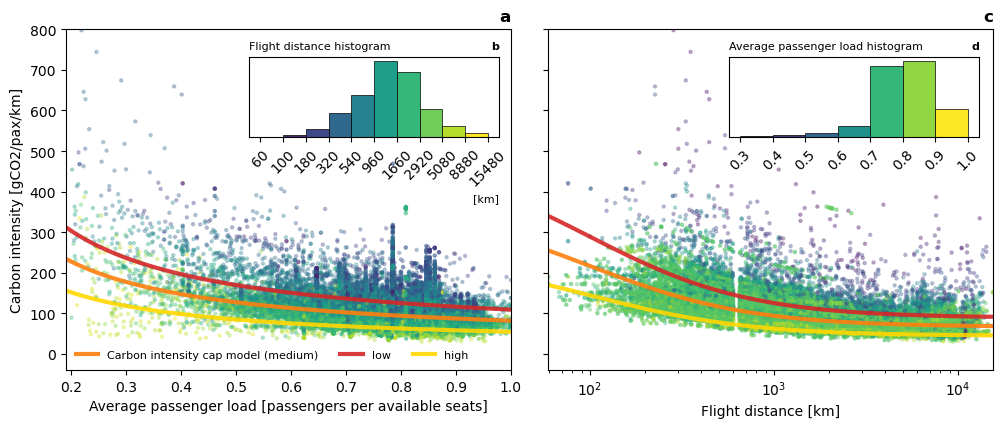

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4), sharey=True)
axh1 = fig.add_axes([0.23, 0.68, 0.25, 0.2])     # histogram axes
axh2 = fig.add_axes([0.71, 0.68, 0.25, 0.2])     # histogram axes
plt.tight_layout()

# left subplot
ax1.scatter(average_load, intensity, 5, c=np.log(distance), alpha=.3, cmap="viridis")
ax1.set_xlabel("Average passenger load [passengers per available seats]")
ax1.set_ylabel("Carbon intensity [gCO2/pax/km]")

ax1.set_xlim(0.19, 1)
ax1.set_ylim(-40, 800)
ax1.set_title("a", loc="right", fontweight="bold")

# add carbon intensity cap model
load = np.linspace(0, 1, 100)
base_distance = 1000
ax1.plot(load, carbon_cap_med(base_distance, load), color="C1",    lw=3, alpha=0.9, label="Carbon intensity cap model (medium)")
ax1.plot(load, carbon_cap_low(base_distance, load), color="C3",    lw=3, alpha=0.9, label="low")
ax1.plot(load, carbon_cap_high(base_distance, load), color="gold", lw=3, alpha=0.9, label="high")
ax1.legend(loc="lower left", fontsize=8, frameon=False, ncols=3)

# histogram colorbar
bins = np.arange(1, len(counts) + 1)
cmap = plt.get_cmap("viridis")
axh1.bar(bins, counts, width=1, color=cmap((bins-1)/(len(bins)-1)), edgecolor="k", linewidth=0.5)
axh1.set_xticks(np.arange(0, len(counts) + 1)+.5)
axh1.set_xticklabels(np.round(bin_edges/20).astype(int)*20, rotation=45)
axh1.set_title("Flight distance histogram", loc="left", fontsize=8)
axh1.set_title("b", loc="right", fontweight="bold", fontsize=8)
axh1.set_xlabel("[km]", loc="right", fontsize=8)
axh1.get_yaxis().set_visible(False)

# right subplot
ax2.scatter(distance, intensity, 5, c=average_load, alpha=.3, cmap="viridis")
ax2.set_xlabel("Flight distance [km]")
ax2.set_xscale("log")
ax2.set_xlim(m0, m1)
ax2.set_title("c", loc="right", fontweight="bold")

# add carbon intensity cap model
dists = np.logspace(np.log10(m0), np.log10(m1), 100)
base_load = 0.8
ax2.plot(dists, carbon_cap_med(dists, base_load), color="C1",    lw=3, alpha=0.9)
ax2.plot(dists, carbon_cap_low(dists, base_load), color="C3",    lw=3, alpha=0.9)
ax2.plot(dists, carbon_cap_high(dists, base_load), color="gold", lw=3, alpha=0.9)

# histogram colorbar
counts2, bin_edges2 = np.histogram(average_load, bins=np.linspace(0.3, 1, 8))
bins = np.arange(1, len(counts2) + 1)
cmap = plt.get_cmap("viridis")
axh2.bar(bins, counts2, width=1, color=cmap((bins-1)/(len(bins)-1)), edgecolor="k", linewidth=0.5)
axh2.set_xticks(np.arange(0, len(counts2) + 1)+.5)
axh2.set_xticklabels(np.round(bin_edges2*10)/10, rotation=45)
axh2.set_title("Average passenger load histogram", loc="left", fontsize=8)
axh2.set_title("d", loc="right", fontweight="bold", fontsize=8)
axh2.get_yaxis().set_visible(False)

plt.show()